<hr>

***Version: 1001.1792024.qut.cs.tnl***

***Sk Tanzir Mehedi, PhD Student, QUT***

***Supervisory Team: Prof. Raja Jurdak & Dr Chadni Islam***
<hr>

**----Start of Step 4 Analysis----**

In [1]:
import pandas as pd
from difflib import SequenceMatcher

df_combined = pd.read_excel('D:/Final Version/Step 4 SimilarityAlgorithms/SimilarityAlgorithmsOutput.xlsx')

def calculate_similarity(str1, str2):
    str1 = str(str1)
    str2 = str(str2)
    return SequenceMatcher(None, str1, str2).ratio()

similarity_threshold = 0.7

total_entries = len(df_combined)
accuracies = {
    'Sequence Matcher': 0,
    'Cosine Similarity': 0,
    'Jaccard Similarity': 0,
    'Levenshtein Distance': 0,
}

for index, row in df_combined.iterrows():
    malicious_name = str(row['Malicious Package Name'])

    # Compare with Sequence Matcher
    sequence_name = str(row['Benign Package Name SM'])
    if calculate_similarity(malicious_name, sequence_name) >= similarity_threshold:
        accuracies['Sequence Matcher'] += 1

    # Compare with Cosine Similarity
    cosine_name = str(row['Benign Package Name CS'])
    if calculate_similarity(malicious_name, cosine_name) >= similarity_threshold:
        accuracies['Cosine Similarity'] += 1

    # Compare with Jaccard Similarity
    jaccard_name = str(row['Benign Package Name JS'])
    if calculate_similarity(malicious_name, jaccard_name) >= similarity_threshold:
        accuracies['Jaccard Similarity'] += 1

    # Compare with Levenshtein Distance
    levenshtein_name = str(row['Benign Package Name LS'])
    if calculate_similarity(malicious_name, levenshtein_name) >= similarity_threshold:
        accuracies['Levenshtein Distance'] += 1

for method in accuracies:
    accuracy_percentage = (accuracies[method] / total_entries) * 100
    print(f"Accuracy for {method}: {accuracy_percentage:.2f}%")

Accuracy for Sequence Matcher: 81.06%
Accuracy for Cosine Similarity: 5.30%
Accuracy for Jaccard Similarity: 58.31%
Accuracy for Levenshtein Distance: 73.06%


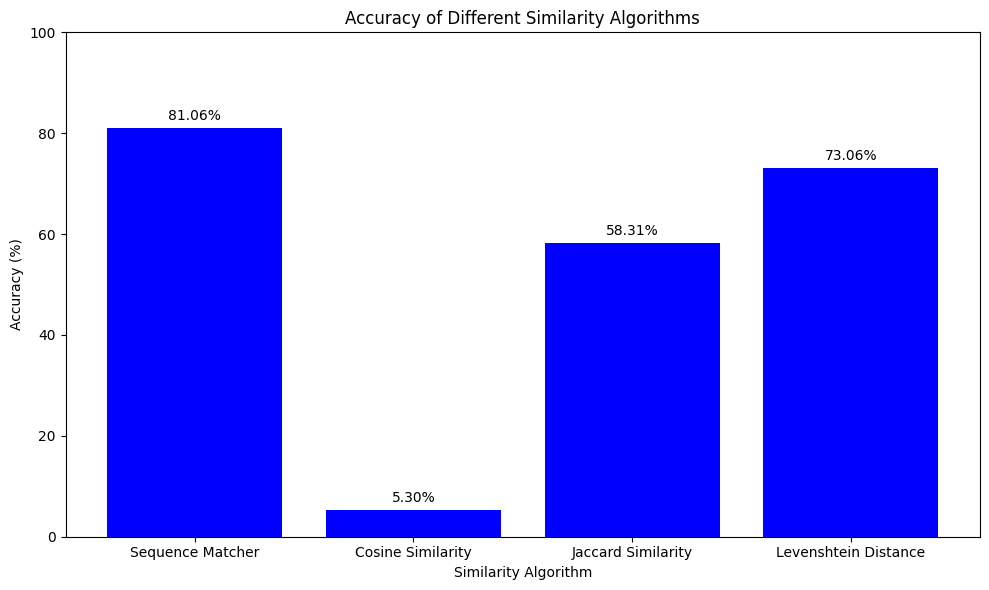

In [5]:
import matplotlib.pyplot as plt

methods = list(accuracies.keys())
accuracy_percentages = [(accuracies[method] / total_entries) * 100 for method in methods]

plt.figure(figsize=(10, 6))
plt.bar(methods, accuracy_percentages, color='blue')
plt.xlabel('Similarity Algorithm')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Similarity Algorithms')
plt.ylim(0, 100) 
plt.tight_layout()

for i, v in enumerate(accuracy_percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')
plt.savefig('Accuracy of Different Similarity Algorithms.png', dpi=600)
plt.show()


**----End of Step 4 Analysis----**